INFO:tensorflow:Restoring parameters from /home/ds/Lifting-from-the-Deep-release/data/saved_sessions/init_session/init


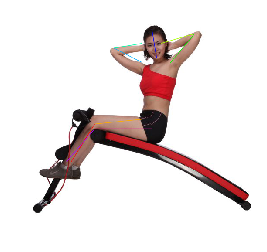

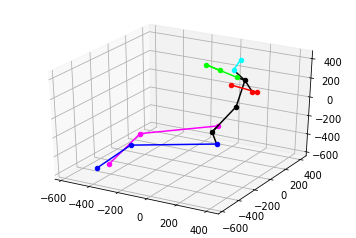

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Created on Dec 20 17:39 2016

@author: Denis Tome'
"""

import __init__

from lifting import PoseEstimator
from lifting.utils import draw_limbs
from lifting.utils import plot_pose

import cv2
import matplotlib.pyplot as plt
from os.path import dirname, realpath

DIR_PATH = '/home/ds/Lifting-from-the-Deep-release/applications'
PROJECT_PATH = realpath(DIR_PATH + '/..')
IMAGE_FILE_PATH = PROJECT_PATH + '/data/images/B0099MKUOG.28-1296622168.LXXXXXXX.jpg'
SAVED_SESSIONS_DIR = PROJECT_PATH + '/data/saved_sessions'
SESSION_PATH = SAVED_SESSIONS_DIR + '/init_session/init'
PROB_MODEL_PATH = SAVED_SESSIONS_DIR + '/prob_model/prob_model_params.mat'


def main():
    image = cv2.imread(IMAGE_FILE_PATH)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # conversion to rgb

    # create pose estimator
    image_size = image.shape

    pose_estimator = PoseEstimator(image_size, SESSION_PATH, PROB_MODEL_PATH)

    # load model
    pose_estimator.initialise()

    # estimation
    pose_2d, visibility, pose_3d = pose_estimator.estimate(image)

    # close model
    pose_estimator.close()

    # Show 2D and 3D poses
    display_results(image, pose_2d, visibility, pose_3d)


def display_results(in_image, data_2d, joint_visibility, data_3d):
    """Plot 2D and 3D poses for each of the people in the image."""
    plt.figure()
    draw_limbs(in_image, data_2d, joint_visibility)
    plt.imshow(in_image)
    plt.axis('off')

    # Show 3D poses
    for single_3D in data_3d:
        # or plot_pose(Prob3dPose.centre_all(single_3D))        
        plot_pose(single_3D)

    plt.show()

if __name__ == '__main__':
    import sys
    sys.exit(main())
